In [519]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from pyproj import Proj, transform
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
import sklearn.linear_model as linreg
from sklearn.metrics import accuracy_score
import seaborn as sns
import datetime
import ast
from sklearn import preprocessing
from sklearn.linear_model import Lasso, Ridge
warnings.filterwarnings("ignore")
%matplotlib inline

In [103]:
rent_studio = pd.read_csv('csv/Zip_MedianRentalPrice_Studio.csv')
zip_code_list = pd.read_csv('csv/zipcode_by_neighborhood.csv', index_col = 0)

In [104]:
zip_code_list['zipcodes'] = zip_code_list['zipcodes'].apply(lambda x: ast.literal_eval(x)) 

In [105]:
zip_code_list

,borough,neighborhood,zipcodes
0,Bronx,BronxCentral,"[10453, 10457, 10460]"
1,Bronx,Bronx Park and Fordham,"[10458, 10467, 10468]"
2,Bronx,High Bridge,"[10451, 10452, 10456]"
3,Bronx,Hunts Point and Mott Haven,"[10454, 10455, 10459, 10474]"
4,Bronx,Kingsbridge and Riverdale,"[10463, 10471]"
5,Bronx,Northeast Bronx,"[10466, 10469, 10470, 10475]"
6,Bronx,Southeast Bronx,"[10461, 10462, 10464, 10465, 10472, 10473]"
7,Brooklyn,Central Brooklyn,"[11212, 11213, 11216, 11233, 11238]"
8,Brooklyn,Southwest Brooklyn,"[11209, 11214, 11228]"
9,Brooklyn,Borough Park,"[11204, 11218, 11219, 11230]"


In [106]:
rent_studio_nys = rent_studio[rent_studio.State == 'NY']

In [107]:
rent_studio_nys = rent_studio_nys.reset_index(drop = True)

In [108]:
rent_studio_nyc = rent_studio_nys[(rent_studio_nys['CountyName'] == 'Bronx')|(rent_studio_nys['CountyName'] == 'Kings')|(rent_studio_nys['CountyName'] == 'New York')|(rent_studio_nys['CountyName'] == 'Queens')]

In [109]:
rent_studio_nyc['gentrification_label'] = np.nan

In [112]:
# Bronx 
Northeast_Bronx = zip_code_list[zip_code_list['neighborhood']=="Northeast Bronx"]['zipcodes'].values[0]
Southeast_Bronx = zip_code_list[zip_code_list['neighborhood']=="Southeast Bronx"]['zipcodes'].values[0]
BronxPark_Fordham = zip_code_list[zip_code_list['neighborhood']=='Bronx Park and Fordham']['zipcodes'].values[0]
# HighBridge = zip_code_list[zip_code_list['neighborhood']=="High Bridge"]['zipcodes'].values[0]
# HuntsPoint_MottHaven = zip_code_list[zip_code_list['neighborhood']=="Hunts Point and Mott Haven"]['zipcodes'].values[0]
# Kingsbridge_Riverdale = zip_code_list[zip_code_list['neighborhood']=="Kingsbridge and Riverdale"]['zipcodes'].values[0]

# Brooklyn
Central_Brooklyn = zip_code_list[zip_code_list['neighborhood']=="Central Brooklyn"]['zipcodes'].values[0]
Southwest_Brooklyn = zip_code_list[zip_code_list['neighborhood']=="Southwest Brooklyn"]['zipcodes'].values[0]
Borough_Park = zip_code_list[zip_code_list['neighborhood']=="Borough Park"]['zipcodes'].values[0]
Canarsie_Flatlands = zip_code_list[zip_code_list['neighborhood']=="Canarsie and Flatlands"]['zipcodes'].values[0]
Northwest_Brooklyn = zip_code_list[zip_code_list['neighborhood']=="Northwest Brooklyn"]['zipcodes'].values[0]
Southern_Brooklyn = zip_code_list[zip_code_list['neighborhood']=="Southern Brooklyn"]['zipcodes'].values[0]
Flatbush = zip_code_list[zip_code_list['neighborhood']=="Flatbush"]['zipcodes'].values[0]
EastNewYork_NewLots = zip_code_list[zip_code_list['neighborhood']=="East New York and New Lots"]['zipcodes'].values[0]
Greenpoint = zip_code_list[zip_code_list['neighborhood']=="Greenpoint"]['zipcodes'].values[0]
Sunset_Park = zip_code_list[zip_code_list['neighborhood']=="Sunset Park"]['zipcodes'].values[0]
Williamsburg = zip_code_list[zip_code_list['neighborhood']=="Williamsburg"]['zipcodes'].values[0]
CentralHarlem = zip_code_list[zip_code_list['neighborhood']=="Central Harlem"]['zipcodes'].values[0]
Chelsea_Clinton = zip_code_list[zip_code_list['neighborhood']=="Chelsea and Clinton"]['zipcodes'].values[0]
EastHarlem = zip_code_list[zip_code_list['neighborhood']=="East Harlem"]['zipcodes'].values[0]
GramercyPark_MurrayHill = zip_code_list[zip_code_list['neighborhood']=="Gramercy Park and Murray Hill"]['zipcodes'].values[0]
GreenwichVillage_Soho = zip_code_list[zip_code_list['neighborhood']=="Greenwich Village and Soho"]['zipcodes'].values[0]
Lower_Manhattan = zip_code_list[zip_code_list['neighborhood']=="Lower Manhattan"]['zipcodes'].values[0]
LowerEastSide = zip_code_list[zip_code_list['neighborhood']=="Lower East Side"]['zipcodes'].values[0]
UpperEastSide = zip_code_list[zip_code_list['neighborhood']=="Upper East Side"]['zipcodes'].values[0]
UpperWestSide = zip_code_list[zip_code_list['neighborhood']=="Upper West Side"]['zipcodes'].values[0]
Inwood_WashingtonHeights = zip_code_list[zip_code_list['neighborhood']=="Inwood and Washington Heights"]['zipcodes'].values[0]
Northeast_Queens = zip_code_list[zip_code_list['neighborhood']=="Northeast Queens"]['zipcodes'].values[0]
North_Queens = zip_code_list[zip_code_list['neighborhood']=="North Queens"]['zipcodes'].values[0]
Jamaica = zip_code_list[zip_code_list['neighborhood']=="Jamaica"]['zipcodes'].values[0]
NorthwestQueens = zip_code_list[zip_code_list['neighborhood']=="Northwest Queens"]['zipcodes'].values[0]
WestCentralQueens = zip_code_list[zip_code_list['neighborhood']=="West Central Queens"]['zipcodes'].values[0]
Rockaways = zip_code_list[zip_code_list['neighborhood']=="Rockaways"]['zipcodes'].values[0]
SoutheastQueens = zip_code_list[zip_code_list['neighborhood']=="Southeast Queens"]['zipcodes'].values[0]





In [230]:
WestQueens = zip_code_list[zip_code_list['neighborhood']=="West Queens"]['zipcodes'].values[0]
WestQueens 

['11368', '11369', '11370', '11372', '11373', '11377', '11378']

In [125]:
# rent_studio_nyc = rent_studio_nyc.replace(rent_studio_nyc[rent_studio_nyc['RegionName'].isin(HighBridge)]['gentrification_label'].values, ['Non-Gentrifying'])

In [120]:
# Bronx 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(BronxPark_Fordham)] = ['Non-Gentrifying','Non-Gentrifying','Non-Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Northeast_Bronx)] = ['Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10473] = ['Non-Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10462] = ['Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10461] = ['Higher-Income']

# Brooklyn
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Central_Brooklyn)] = ['Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Central_Brooklyn)] = ['Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Southwest_Brooklyn)] = ['Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Borough_Park)] = ['Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Canarsie_Flatlands)] = ['Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Southern_Brooklyn)] = ['Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Northwest_Brooklyn)] = ['Higher-Income', 'Higher-Income', 'Higher-Income', 'Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(EastNewYork_NewLots)] = ['Non-Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(EastNewYork_NewLots)] = ['Non-Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Central_Brooklyn)] = ['Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Williamsburg)] = ['Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Bushwick)] = ['Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Chelsea_Clinton)] = ['Higher-Income','Higher-Income','Higher-Income', 'Higher-Income', 'Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(EastHarlem)] = ['Gentrifying','Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(GramercyPark_MurrayHill)] = ['Higher-Income','Higher-Income', 'Higher-Income', 'Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(GreenwichVillage_Soho)] = ['Higher-Income','Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10038] = ['Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10005] = ['Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10280] = ['Higher-Income']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10006] = ['Higher-Income']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10004] = ['Higher-Income']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(LowerEastSide)] = ['Gentrifying','Gentrifying', 'Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(UpperWestSide)] = ['Higher-Income','Higher-Income', 'Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Inwood_WashingtonHeights)] = ['Gentrifying','Gentrifying'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Northeast_Queens)] = ['Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(North_Queens)] = ['Higher-Income','Higher-Income','Higher-Income','Higher-Income','Higher-Income','Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(CentralQueens)] = ['Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(Jamaica)] = ['Higher-Income','Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 11106] = ['Gentrifying']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 11102] = ['Gentrifying']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 11101] = ['Higher-Income']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(WestCentralQueens)] = ['Higher-Income','Higher-Income','Higher-Income','Higher-Income'] 
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 11249] = ['Gentrifying']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 11109] = ['Higher-Income']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10069] = ['Higher-Income']

In [232]:
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'].isin(WestQueens)] = ['Higher-Income','Higher-Income','Higher-Income'] 

In [236]:
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 11249] = ['Gentrifying']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 11109] = ['Higher-Income']
rent_studio_nyc['gentrification_label'][rent_studio_nyc['RegionName'] == 10069] = ['Higher-Income']

In [684]:
# rent_studio_nyc.to_csv('rent_studio_w_gentrification_flag.csv')

In [250]:
rent_plot = rent_studio_nyc[rent_studio_nyc['gentrification_label'] == 'Higher-Income'].transpose()
rent_plot.columns = list(rent_plot.loc['RegionName',:])
rent_plot = rent_plot.loc['2011-11':'2018-09',:]
rent_plot.index = pd.to_datetime(rent_plot.index)

In [575]:
zipcodes = rent_plot.columns

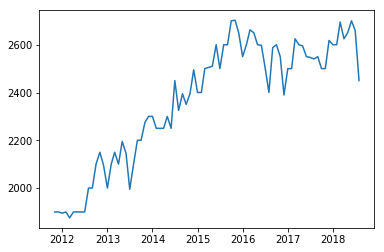

In [274]:
plt.plot(rent_plot[zipcodes[0]])
plt.show()

In [574]:
rent_plot = rent_plot.drop([zipcodes[30]], axis = 1)

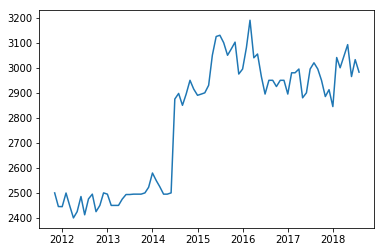

In [411]:
plt.plot(rent_plot[zipcodes[37]])
plt.show()

In [282]:
for zipcode in zipcodes:
    rent_plot[zipcode] = pd.to_numeric(rent_plot[zipcode], errors='coerce')

In [285]:
rent_plot = rent_plot.interpolate(method = 'linear', axis = 0)
rent_plot = rent_plot.fillna(method='bfill')

In [582]:
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
rent_plot_high_income_normalized = min_max_scaler.fit_transform(rent_plot)
# Run the normalizer on the dataframe
rent_plot_high_income_normalized = pd.DataFrame(rent_plot_high_income_normalized)

In [583]:
rent_plot_high_income_normalized.columns = rent_plot.columns
rent_plot_high_income_normalized.index = rent_plot.index

In [665]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition_higher_income = seasonal_decompose(rent_plot)

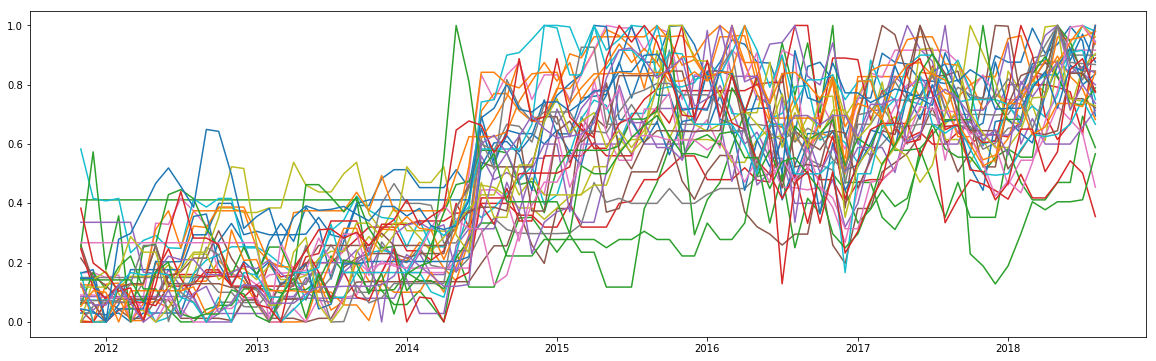

In [585]:
plt.figure(figsize=(20, 6))
plt.plot(rent_plot_high_income_normalized)
plt.show()

In [593]:
mean_high_income_normalized = rent_plot_high_income_normalized.mean(axis = 1)

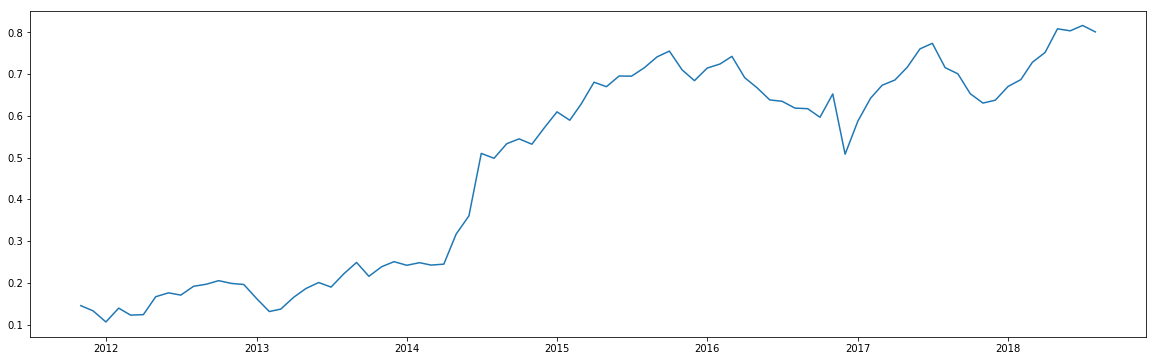

In [595]:
plt.figure(figsize=(20, 6))
plt.plot(mean_high_income_normalized)
plt.show()

In [598]:
mean_gentrifying_normalized = rent_plot_gentrifying_normalized.mean(axis = 1)

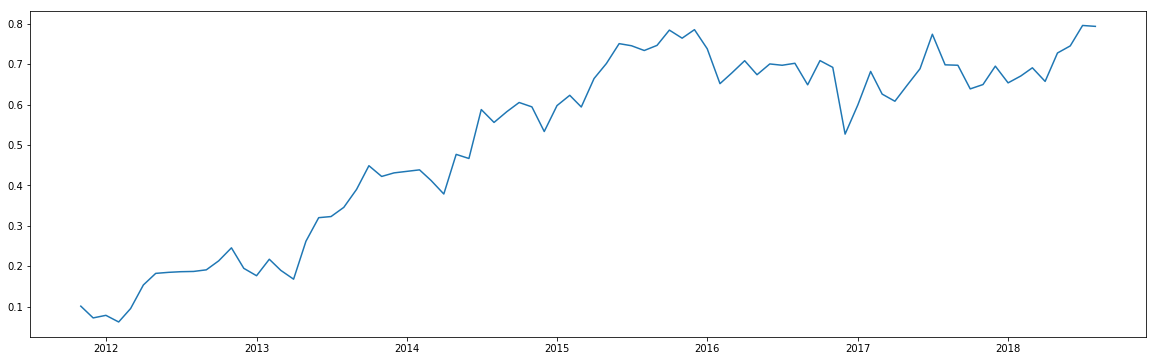

In [599]:
plt.figure(figsize=(20, 6))
plt.plot(mean_gentrifying_normalized)
plt.show()

In [601]:
mean_non_gentrifying_normalized = rent_plot_non_gentrifying_normalized.mean(axis = 1)

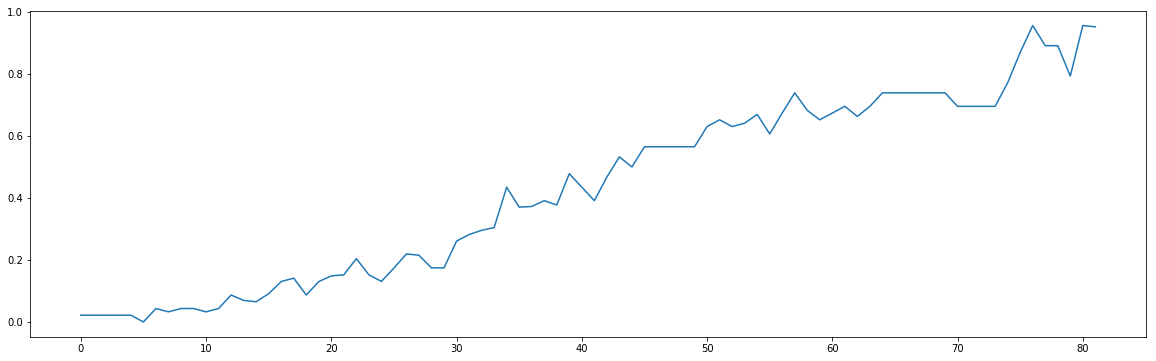

In [602]:
plt.figure(figsize=(20, 6))
plt.plot(mean_non_gentrifying_normalized)
plt.show()

In [523]:
def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return np.sqrt(DTW[len(s1)-1, len(s2)-1])

In [603]:
DTWDistance(rent_plot_high_income_normalized[zipcodes[1]], mean_non_gentrifying_normalized)

0.8616520528923965

In [651]:
DTWDistance(rent_plot_high_income_normalized[zipcodes[2]], mean_non_gentrifying_normalized)

2.0809374503858633

In [614]:
rent_plot_non_gentrifying_normalized.columns = zipcodes_non_gentrifying

In [615]:
DTWDistance(mean_non_gentrifying_normalized, rent_plot_non_gentrifying_normalized[zipcodes_non_gentrifying[0]])

0.42435116712868615

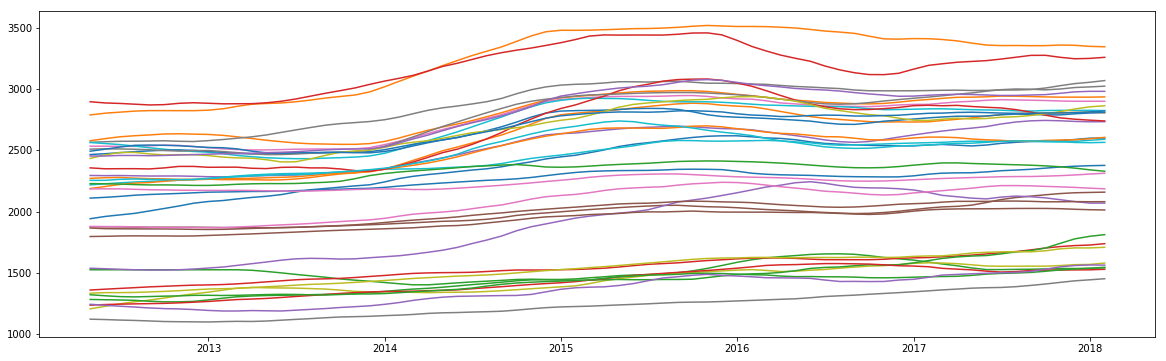

In [666]:
plt.figure(figsize=(20, 6))
plt.plot(decomposition_higher_income.trend)
plt.show()

In [300]:
rent_plot_gentrifying = rent_studio_nyc[rent_studio_nyc['gentrification_label'] == 'Gentrifying'].transpose()

In [301]:
rent_plot_gentrifying.columns = list(rent_plot_gentrifying.loc['RegionName',:])
rent_plot_gentrifying = rent_plot_gentrifying.loc['2011-11':'2018-08',:]
rent_plot_gentrifying.index = pd.to_datetime(rent_plot_gentrifying.index)

In [449]:
zipcodes_gentrifying = rent_plot_gentrifying.columns

In [306]:
for zipcode in zipcodes_gentrifying:
    rent_plot_gentrifying[zipcode] = pd.to_numeric(rent_plot_gentrifying[zipcode], errors='coerce')

In [307]:
rent_plot_gentrifying = rent_plot_gentrifying.interpolate(method = 'linear', axis = 0)
rent_plot_gentrifying = rent_plot_gentrifying.fillna(method='bfill')

In [448]:
rent_plot_gentrifying = rent_plot_gentrifying.drop([zipcodes_gentrifying[9]], axis = 1)

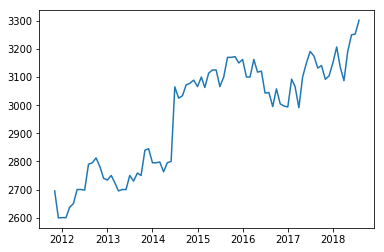

In [453]:
plt.plot(rent_plot_gentrifying[zipcodes_gentrifying[9]])
plt.show()

In [454]:
decomposition_gentrifying = seasonal_decompose(rent_plot_gentrifying)

In [526]:
from sklearn import preprocessing
# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
rent_plot_gentrifying_normalized = min_max_scaler.fit_transform(rent_plot_gentrifying)
# Run the normalizer on the dataframe
rent_plot_gentrifying_normalized = pd.DataFrame(rent_plot_gentrifying_normalized)

In [527]:
rent_plot_gentrifying_normalized.columns = rent_plot_gentrifying.columns
rent_plot_gentrifying_normalized.index = rent_plot_gentrifying.index

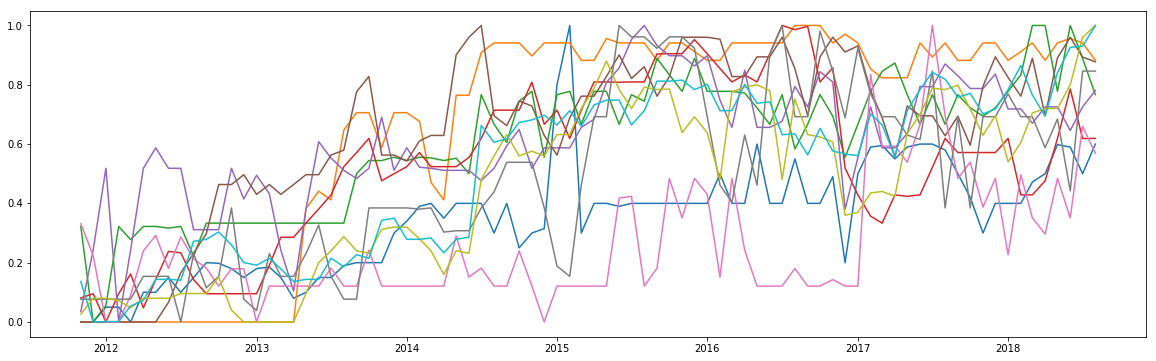

In [518]:
plt.figure(figsize=(20, 6))
plt.plot(df_normalized)
plt.show()

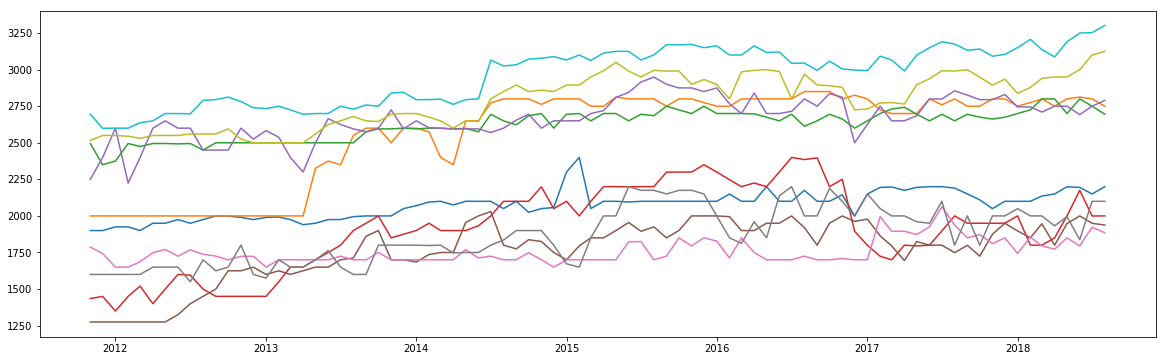

In [502]:
plt.figure(figsize=(20, 6))
plt.plot(rent_plot_gentrifying)
plt.show()

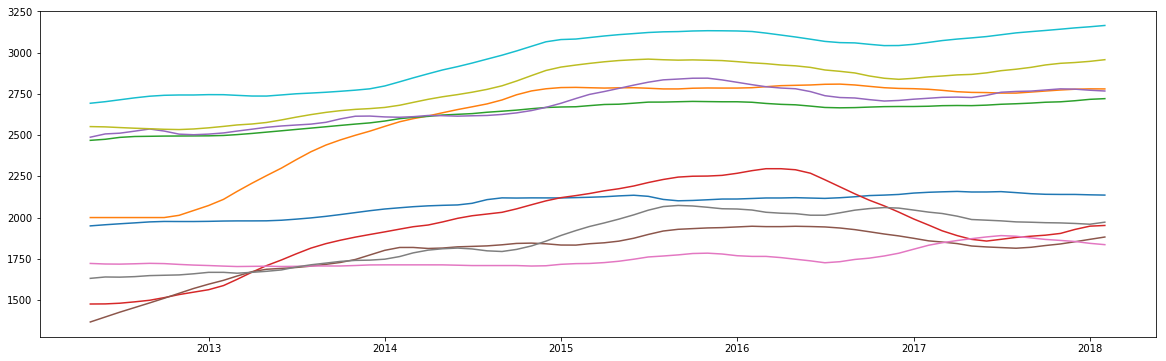

In [499]:
plt.figure(figsize=(20, 6))
plt.plot(decomposition_gentrifying.trend)
plt.show()

In [475]:
rent_plot_non_gentrifying = rent_studio_nyc[rent_studio_nyc['gentrification_label'] == 'Non-Gentrifying'].transpose()

In [476]:
rent_plot_non_gentrifying.columns = list(rent_plot_non_gentrifying.loc['RegionName',:])
rent_plot_non_gentrifying = rent_plot_non_gentrifying.loc['2011-11':'2018-08',:]
rent_plot_non_gentrifying.index = pd.to_datetime(rent_plot_non_gentrifying.index)

In [494]:
zipcodes_non_gentrifying = rent_plot_non_gentrifying.columns

In [478]:
for zipcode in zipcodes_non_gentrifying:
    rent_plot_non_gentrifying[zipcode] = pd.to_numeric(rent_plot_non_gentrifying[zipcode], errors='coerce')

In [479]:
rent_plot_non_gentrifying = rent_plot_non_gentrifying.interpolate(method = 'linear', axis = 0)
rent_plot_non_gentrifying = rent_plot_non_gentrifying.fillna(method='bfill')

In [493]:
rent_plot_non_gentrifying = rent_plot_non_gentrifying.drop([zipcodes_non_gentrifying[2]], axis = 1)

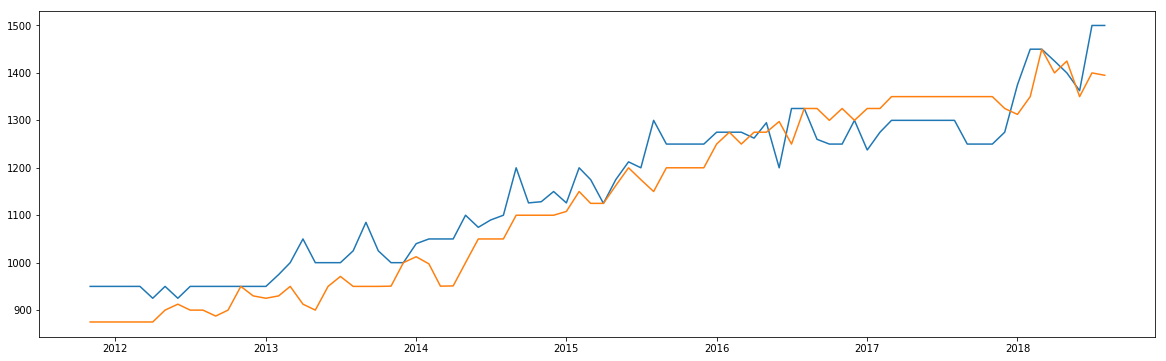

In [668]:
plt.figure(figsize=(20, 6))
plt.plot(rent_plot_non_gentrifying)
plt.show()

In [667]:
decomposition_non_gentrifying = seasonal_decompose(rent_plot_non_gentrifying)

In [680]:
# plt.figure(figsize=(20, 6))
# plt.plot(decomposition_non_gentrifying.trend)
# plt.show()

In [677]:
rent_plot_non_gentrifying_normalized.index = rent_plot_non_gentrifying.index

In [678]:
decomposition_non_gentrifying_norm = seasonal_decompose(rent_plot_non_gentrifying_normalized)

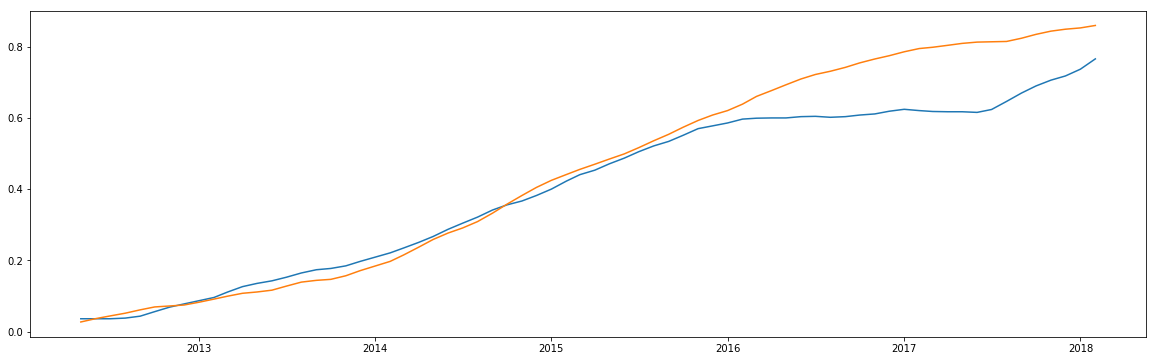

In [679]:
plt.figure(figsize=(20, 6))
plt.plot(decomposition_non_gentrifying_norm.trend)
plt.show()

#### Clustering

In [648]:
# compare all time series for high income area to the mean plots of all 3 classes
list_ = ['high_income' , 'gentrifying','non_gentrifying']
high_income = []
gentrifying = []
non_gentrifying = []
for zipcode in zipcodes:
    high_income_for_zip = DTWDistance(rent_plot_high_income_normalized[zipcode], mean_high_income_normalized)
    high_income.append(high_income_for_zip)
    gentrifying_for_zip = DTWDistance(rent_plot_high_income_normalized[zipcode], mean_gentrifying_normalized)
    gentrifying.append(gentrifying_for_zip)
    non_gentrifying_for_zip = DTWDistance(rent_plot_high_income_normalized[zipcode], mean_non_gentrifying_normalized)
    non_gentrifying.append(non_gentrifying_for_zip)

In [657]:
# compare all time series for gentrifyng area to the mean plots of all 3 classes
high_income_gent = []
gentrifying_gent = []
non_gentrifying_gent = []
for zipcode in zipcodes_gentrifying:
    high_income_for_zip = DTWDistance(rent_plot_gentrifying_normalized[zipcode], mean_high_income_normalized)
    high_income_gent.append(high_income_for_zip)
    gentrifying_for_zip = DTWDistance(rent_plot_gentrifying_normalized[zipcode], mean_gentrifying_normalized)
    gentrifying_gent.append(gentrifying_for_zip)
    non_gentrifying_for_zip = DTWDistance(rent_plot_gentrifying_normalized[zipcode], mean_non_gentrifying_normalized)
    non_gentrifying_gent.append(non_gentrifying_for_zip)

In [658]:
zipped = list(zip(high_income,gentrifying_gent, non_gentrifying_gent))

In [663]:
score_gentrifying = []
for item in zipped_gentrifying:   
    min_ = item.index(min(item))
    score_gentrifying.append(list_[min_])

In [662]:
zipped_gentrifying = list(zip(high_income_gent,gentrifying, non_gentrifying))
# zipped

In [664]:
score_gentrifying

['non_gentrifying',
 'non_gentrifying',
 'high_income',
 'non_gentrifying',
 'gentrifying',
 'non_gentrifying',
 'non_gentrifying',
 'non_gentrifying',
 'high_income',
 'high_income']

In [645]:
min(zipped[0])

(0.7821215740262119, 0.8013428949602309, 0.5945492010948699)

In [660]:
score = []
for item in zipped:   
    min_ = item.index(min(item))
    score.append(list_[min_])